# Enter Clustering

Machine Learning is divided into three main categories:

## Supervised Learning

- all data used is labelled (with ground truth information)
- the algorithm is provided direct feedback
- the algorithm is meant to predict outcome


### Classification

<p><a href="https://commons.wikimedia.org/wiki/File:Svm_separating_hyperplanes.png#/media/File:Svm_separating_hyperplanes.png"><img src="https://upload.wikimedia.org/wikipedia/commons/2/20/Svm_separating_hyperplanes.png" alt="Svm separating hyperplanes.png" width="503" height="480"></a><br>By &lt;a href="//commons.wikimedia.org/w/index.php?title=User:Cyc&amp;amp;action=edit&amp;amp;redlink=1" class="new" title="User:Cyc (page does not exist)"&gt;Cyc&lt;/a&gt; - &lt;span class="int-own-work" lang="en"&gt;Own work&lt;/span&gt;, Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=3566969">Link</a></p>



### Regression

![from commons.wikimedia.org](https://commons.wikimedia.org/wiki/File:Linear_regression.svg#/media/File:Linear_regression.svg)



## Unsupervised Learning

- there are **NO** labels (with ground truth information)
- no feedback is provided to the algorithm
- goal: find hidden structure in data

<p><a href="https://commons.wikimedia.org/wiki/File:KMeans-Gaussian-data.svg#/media/File:KMeans-Gaussian-data.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e5/KMeans-Gaussian-data.svg/1200px-KMeans-Gaussian-data.svg.png" alt="KMeans-Gaussian-data.svg"></a><br>By &lt;a href="//commons.wikimedia.org/wiki/User:Chire" title="User:Chire"&gt;Chire&lt;/a&gt; - &lt;span class="int-own-work" lang="en"&gt;Own work&lt;/span&gt;, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=17085714">Link</a></p>

## Reinforcement Learning

- model a decision process
- reward system
- learn series of actions

# Some Notation 

- we are given a dataset of size $n$ as 

$\mathcal{D} = \{ \langle \vec{x}, y \rangle_{i}, i = 1, \dots, n \} $

- the data represents a mapping: 

$f(\vec{x}) = y$

- machine learning produces a hypothesis: 

$h(\vec{x}) = \hat{y}$

## classification versus regression

- classification: 

$h : \mathcal{R}^n \rightarrow \mathcal{Z} $ 

(e.g. for 3 categories ${0,1,2}$)

- regression: 

$h : \mathcal{R}^n \rightarrow \mathcal{R} $ (regression can also produce $\mathcal{R}^{n}$


## Data

For the following, I will rely on the Palmer penguin dataset obtained from [this repo](https://github.com/allisonhorst/palmerpenguins). To quote the repo:

> Data were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php)
> and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/).


In [1]:
import pandas as pd
print("pandas version:", pd.__version__)


pandas version: 1.0.5


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv")
print(df.head())
print(df.tail())

print("looks good so far")


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  
       species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
339  Chinstrap  Dream            55.8           19.8              207.0   
340  Chinstrap  Dream            43.5           18.1              202.0   
341  Chinstrap  Dream            49.6           18.2              193.0   
342  Chinstrap  Dream            50.8           19.0              210

In [ ]:
print(df.shape)
print(df.dtypes)
print(">> columns species, island and sex are encoded as strings")

In [25]:
df[["species_"]] = df[["species"]].astype("category")
print(df[["species_"]].head())
print(df.species_.cat.codes.head())

  species_
0   Adelie
1   Adelie
2   Adelie
3   Adelie
4   Adelie
0    0
1    0
2    0
3    0
4    0
dtype: int8


In [26]:
print("make sure the categories are correctly encoded")
print(pd.unique(df.species_))
print(pd.unique(df.species_.cat.codes))


make sure the categories are correctly encoded
[Adelie, Gentoo, Chinstrap]
Categories (3, object): [Adelie, Gentoo, Chinstrap]
[0 2 1]


There are 3 types of penguins in this dataset: 

![Artwork by @allison_horst](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/man/figures/lter_penguins.png)



Important feature columns of this data set are nicely described by

![Artwork by @allison_horst](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/man/figures/culmen_depth.png)

In [44]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.style.use('dark_background')

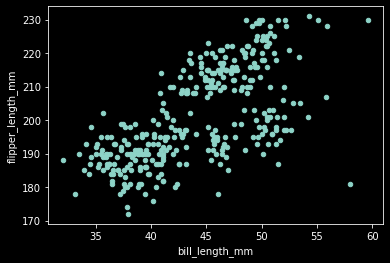

In [45]:
#we want to cluster the penguins and work towards a classification using this

ax2 = df.plot.scatter(x='bill_length_mm',
                      y='flipper_length_mm')




In [49]:
#to make out lives a bit easier, let's use a wrapper library for matplotlib
import seaborn as sns
print(f'seaborn version: {sns.__version__}')

seaborn version: 0.10.1


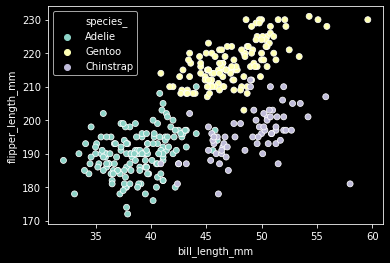

In [50]:
#let's mark the dots with a color for each class
sns.scatterplot(x=df.bill_length_mm, y=df.flipper_length_mm, hue=df.species_)
plt.show()


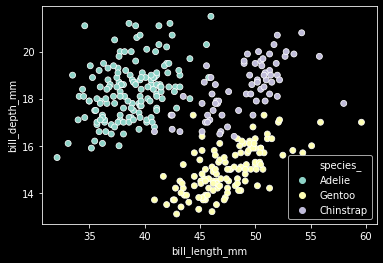

In [51]:
sns.scatterplot(x=df.bill_length_mm, y=df.bill_depth_mm, hue=df.species_)
plt.show()

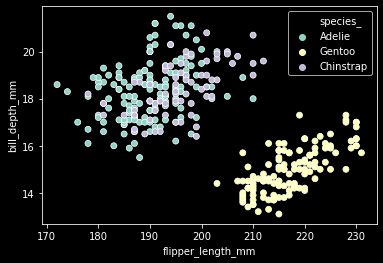

In [52]:
sns.scatterplot(x=df.flipper_length_mm, y=df.bill_depth_mm, hue=df.species_)
plt.show()